In [8]:
from tb_log_reader import LogReader
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set_context("paper", rc={"xtick.labelsize":24, "ytick.labelsize":24, "axes.labelsize":24, "legend.fontsize": 24, "axes.titlesize": 24}) # ,"axes.titlesize":8,"axes.labelsize":5

## Read TF logs

In [8]:
# ! ls tensorboard_logs
# !dir /s tensorboard_logs

In [3]:
lr_no_pretr_val = []
lr_pretr_val = []

path = "C:/Users/JiachennCJC/Documents/GitHub/brats-pretraining_jiachenn/tensorboard_logs"
for i in range(5):
    
    lr_no_pretr = LogReader('tensorboard_logs/brats20_3d_no_pretrained_{}_lr_0.001_epochs_50'.format(i+1))
    lr_no_pretr_events = lr_no_pretr.load_run(0, test=True)
#     lr_no_pretr_events = lr_no_pretr.load_run(0, test=True)

    lr_no_pretr_val.append({
        'edema': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'edema'),
        'tumor_core': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'tumor_core'),
        'enhancing': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'enhancing')
    })
    
    lr_pretr = LogReader('tensorboard_logs/brats20_3d_pre_{}_lr_0.001_epochs_50'.format(i+1))
    lr_pretr_val_events = lr_pretr.load_run(0, test=True)
#     lr_pretr_val_events = lr_pretr.load_run(0, test=True)

    lr_pretr_val.append({
        'edema': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'edema'),
        'tumor_core': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'tumor_core'),
        'enhancing': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'enhancing')
    })

tensorboard_logs/brats20_3d_no_pretrained_1_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_no_pretrained_1_lr_0.001_epochs_50\20210301-142350\test


tensorboard_logs/brats20_3d_pre_1_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_pre_1_lr_0.001_epochs_50\20210301-115902\test
tensorboard_logs/brats20_3d_no_pretrained_2_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_no_pretrained_2_lr_0.001_epochs_50\20210301-191252\test
tensorboard_logs/brats20_3d_pre_2_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_pre_2_lr_0.001_epochs_50\20210301-164845\test
tensorboard_logs/brats20_3d_no_pretrained_3_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_no_pretrained_3_lr_0.001_epochs_50\20210302-000552\test


tensorboard_logs/brats20_3d_pre_3_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_pre_3_lr_0.001_epochs_50\20210301-213737\test
tensorboard_logs/brats20_3d_no_pretrained_4_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_no_pretrained_4_lr_0.001_epochs_50\20210302-045854\test
tensorboard_logs/brats20_3d_pre_4_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_pre_4_lr_0.001_epochs_50\20210302-023414\test
tensorboard_logs/brats20_3d_no_pretrained_5_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_no_pretrained_5_lr_0.001_epochs_50\20210302-094836\test


tensorboard_logs/brats20_3d_pre_5_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_pre_5_lr_0.001_epochs_50\20210302-072332\test


i: 0, Tumor region: edema
i: 1, Tumor region: tumor_core
i: 2, Tumor region: enhancing


<ipython-input-12-70e3ca370963>:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i_plot].set_yticklabels([''] * 7)
<ipython-input-12-70e3ca370963>:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i_plot].set_yticklabels([''] * 7)


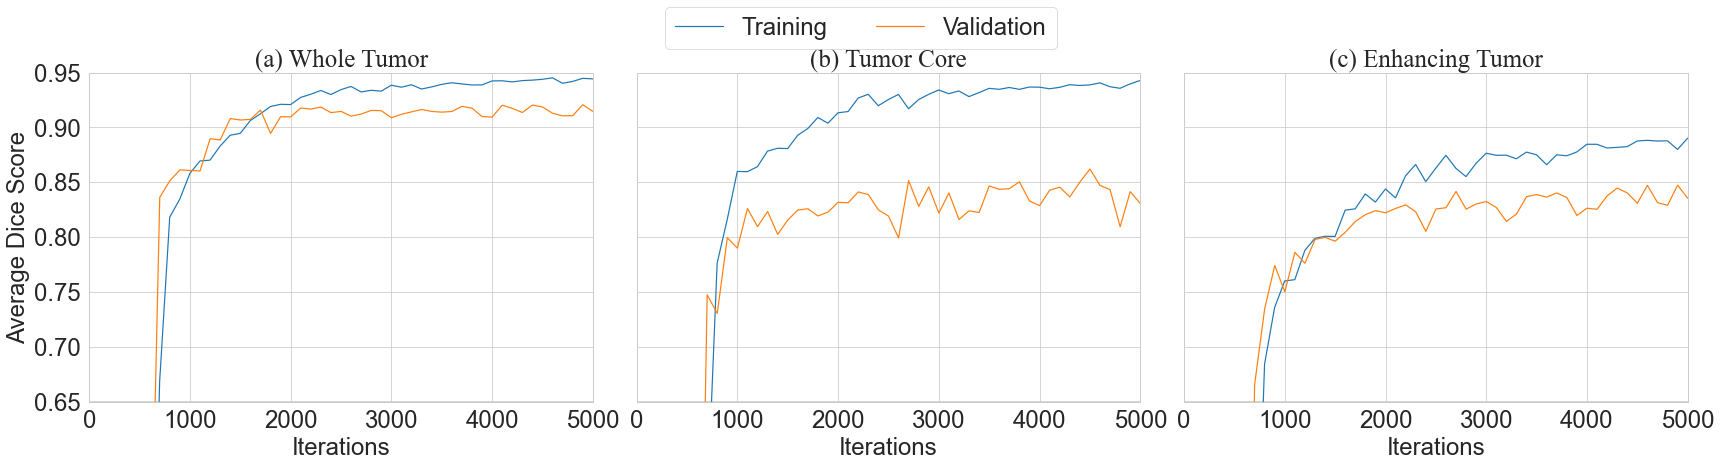

In [12]:
lr_val_list = []
lr_train_list = []

path = "C:/Users/JiachennCJC/Documents/GitHub/brats-pretraining_jiachenn/tensorboard_logs"
model_name = "brats20_3d_pretrained_no_transformations_lr_0.0001_epochs_50_epochbatch_100"

lr_validation = LogReader(f'tensorboard_logs/{model_name}')
lr_val_events = lr_validation.load_run(0, test=True)
#     lr_pretr_val_events = lr_pretr.load_run(0, test=True)

lr_val_list.append({
    'edema': lr_validation.get_df_from_scalar(lr_val_events, 'edema'),
    'tumor_core': lr_validation.get_df_from_scalar(lr_val_events, 'tumor_core'),
    'enhancing': lr_validation.get_df_from_scalar(lr_val_events, 'enhancing')
})

lr_training = LogReader(f'tensorboard_logs/{model_name}')
lr_train_events = lr_training.load_run(0, test=False)

lr_train_list.append({
    'edema': lr_training.get_df_from_scalar(lr_train_events, 'edema'),
    'tumor_core': lr_training.get_df_from_scalar(lr_train_events, 'tumor_core'),
    'enhancing': lr_training.get_df_from_scalar(lr_train_events, 'enhancing')
})
# 3D

label_dict = {
    'edema': '(a) Whole Tumor',
    'tumor_core': '(b) Tumor Core',
    'enhancing': '(c) Enhancing Tumor'
}

f, axes = plt.subplots(1, 3)
f.set_size_inches(24, 6)
# sns.despine(left=True)
sns.set_style("whitegrid")

for i_plot, tumor_region in enumerate(['edema', 'tumor_core', 'enhancing']):
    
    print(f"i: {i_plot}, Tumor region: {tumor_region}")

    label = label_dict[tumor_region]

    df_train = pd.concat([lr_train_list[i][tumor_region][['steps', 'values']].iloc[:] for i in range(1)], axis=0)
    df_valid = pd.concat([lr_val_list[i][tumor_region][['steps', 'values']].iloc[:] for i in range(1)], axis=0)

    df_train = df_train.rename(columns={"steps": "Iterations", "values": "Average Dice Score"})
    df_valid = df_valid.rename(columns={"steps": "Iterations", "values": "Average Dice Score"})
    
#     df_no_pretr.to_csv(f"Albunet3d_nopretrained_{tumor_region}.csv", index=False)
#     df_pretr.to_csv(f"Albunet3d_pretrained_{tumor_region}.csv", index=False)

    #idxs = lr_no_pretr_val[i]['tumor_core']['steps']
    #df_no_pretr = pd.concat([idxs, df_no_pretr], axis=1).set_index('steps')
    #df_pretr = pd.concat([idxs, df_pretr], axis=1).set_index('steps')
    # relplot
    
    f = sns.lineplot(x='Iterations', y='Average Dice Score', data=df_train, markers=True, label='Training', ci='sd', legend=False, ax=axes[i_plot])
    g = sns.lineplot(x='Iterations', y='Average Dice Score', data=df_valid, markers=True, label='Validation', ci='sd', legend=False, ax=axes[i_plot])
    f.set(ylim=(0.65, 0.95))
    g.set(ylim=(0.65, 0.95))
    f.set(xlim=(0, 10000))
    g.set(xlim=(0, 10000))
    axes[i_plot].title.set_text(label)
    axes[i_plot].title.set_y(-0.4)
    axes[i_plot].title.set_fontfamily('Times New Roman')
    axes[i_plot].title.set_fontsize(25)
    # axes[i_plot].title.set_fontserif('Times New Roman')
    # axes[i_plot].title.set_fontname('Times New Roman')
    # axes[i_plot].legend(loc='lower right')
    
    if i_plot > 0:
        #pass
        axes[i_plot].set_ylabel('')
        #axes[i_plot].get_yaxis().set_visible(False)
        axes[i_plot].set_yticklabels([''] * 7)

handles, labels = axes[0].get_legend_handles_labels()
plt.tight_layout()
legend = plt.figlegend(handles=handles, labels=labels, loc='upper center', ncol=2, bbox_to_anchor = (0,0.1,1,1), bbox_transform = plt.gcf().transFigure)

# plt.savefig("figures/eval_progress.pdf", bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

# for i in range(5):
    
    # sns.lineplot(x='steps', y='values', data=lr_no_pretr_val[i]['tumor_core'], dashes=True, markers=True)
    # sns.lineplot(x='steps', y='values', data=lr_pretr_val[i]['edema'], dashes=False, markers=True)


### Brats18

In [21]:
lr_no_pretr_val = []
lr_pretr_val = []
lr_pretr_train_list = []

path = "C:/Users/JiachennCJC/Documents/GitHub/brats-pretraining_jiachenn/tensorboard_logs"
#     brats18_3d_pretrained_1_lr_0.001_epochs_20
#     lr_no_pretr = LogReader('tensorboard_logs/brats_3d_no_pretrained_{}_lr_0.001_epochs_50'.format(i+1))
#     lr_no_pretr_events = lr_no_pretr.load_run(0, test=True)
# #     lr_no_pretr_events = lr_no_pretr.load_run(0, test=True)

#     lr_no_pretr_val.append({
#         'edema': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'edema'),
#         'tumor_core': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'tumor_core'),
#         'enhancing': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'enhancing')
#     })
    
lr_pretr = LogReader('tensorboard_logs/brats18_3d_pretrained_1_no_multigpu_lr_0.001_epochs_20')
lr_pretr_val_events = lr_pretr.load_run(0, test=True)
#     lr_pretr_val_events = lr_pretr.load_run(0, test=True)

lr_pretr_val.append({
    'edema': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'edema'),
    'tumor_core': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'tumor_core'),
    'enhancing': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'enhancing')
})

lr_pretr_train = LogReader('tensorboard_logs/brats18_3d_pretrained_1_no_multigpu_lr_0.001_epochs_20')
lr_pretr_train_events = lr_pretr.load_run(0, test=False)
#     lr_pretr_val_events = lr_pretr.load_run(0, test=True)

lr_pretr_train_list.append({
    'edema': lr_pretr_train.get_df_from_scalar(lr_pretr_train_events, 'edema'),
    'tumor_core': lr_pretr_train.get_df_from_scalar(lr_pretr_train_events, 'tumor_core'),
    'enhancing': lr_pretr_train.get_df_from_scalar(lr_pretr_train_events, 'enhancing')
})

tensorboard_logs/brats18_3d_pretrained_1_no_multigpu_lr_0.001_epochs_20
The selected path is: tensorboard_logs/brats18_3d_pretrained_1_no_multigpu_lr_0.001_epochs_20\20210307-182439\test
tensorboard_logs/brats18_3d_pretrained_1_no_multigpu_lr_0.001_epochs_20
The selected path is: tensorboard_logs/brats18_3d_pretrained_1_no_multigpu_lr_0.001_epochs_20\20210307-182439\train


## Plots the dice scores for pretrained vs non-pretrained model (default -> test set scores)

i: 0, Tumor region: edema


IndexError: list index out of range

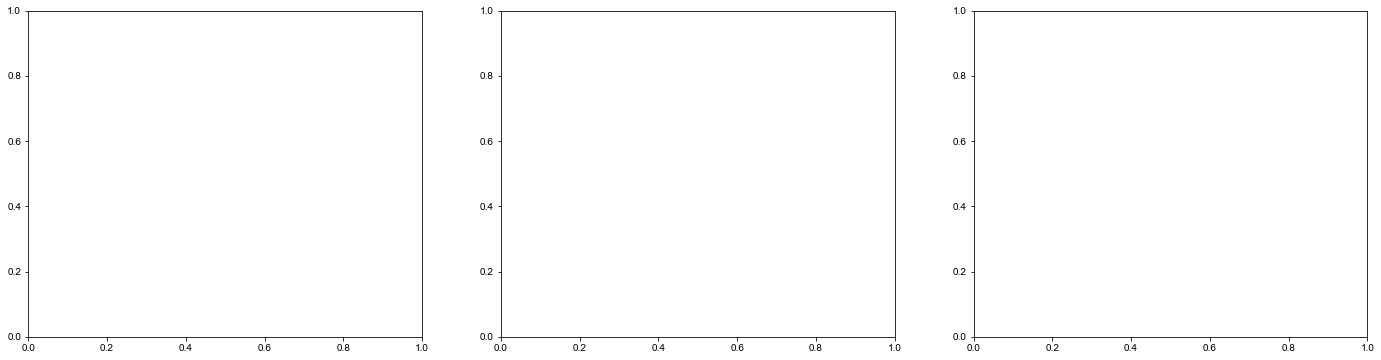

In [8]:
# 3D

label_dict = {
    'edema': '(a) Whole Tumor',
    'tumor_core': '(b) Tumor Core',
    'enhancing': '(c) Enhancing Tumor'
}

f, axes = plt.subplots(1, 3)
f.set_size_inches(24, 6)
# sns.despine(left=True)
sns.set_style("whitegrid")

for i_plot, tumor_region in enumerate(['edema', 'tumor_core', 'enhancing']):
    
    print(f"i: {i_plot}, Tumor region: {tumor_region}")

    label = label_dict[tumor_region]

    df_no_pretr = pd.concat([lr_pretr_train_list[i][tumor_region][['steps', 'values']].iloc[:] for i in range(1)], axis=0)
    df_pretr = pd.concat([lr_pretr_val[i][tumor_region][['steps', 'values']].iloc[:] for i in range(1)], axis=0)

    df_no_pretr = df_no_pretr.rename(columns={"steps": "Iterations", "values": "Average Dice Score"})
    df_pretr = df_pretr.rename(columns={"steps": "Iterations", "values": "Average Dice Score"})
    
#     df_no_pretr.to_csv(f"Albunet3d_nopretrained_{tumor_region}.csv", index=False)
#     df_pretr.to_csv(f"Albunet3d_pretrained_{tumor_region}.csv", index=False)

    #idxs = lr_no_pretr_val[i]['tumor_core']['steps']
    #df_no_pretr = pd.concat([idxs, df_no_pretr], axis=1).set_index('steps')
    #df_pretr = pd.concat([idxs, df_pretr], axis=1).set_index('steps')
    # relplot
    f = sns.lineplot(x='Iterations', y='Average Dice Score', data=df_pretr, markers=True, label='Validation', ci='sd', legend=False, ax=axes[i_plot])
    g = sns.lineplot(x='Iterations', y='Average Dice Score', data=df_no_pretr, markers=True, label='Training', ci='sd', legend=False, ax=axes[i_plot])
    f.set(ylim=(0.65, 0.95))
    g.set(ylim=(0.65, 0.95))
    f.set(xlim=(0, 2000))
    g.set(xlim=(0, 2000))
    axes[i_plot].title.set_text(label)
    axes[i_plot].title.set_y(-0.4)
    axes[i_plot].title.set_fontfamily('Times New Roman')
    axes[i_plot].title.set_fontsize(25)
    # axes[i_plot].title.set_fontserif('Times New Roman')
    # axes[i_plot].title.set_fontname('Times New Roman')
    # axes[i_plot].legend(loc='lower right')
    
    if i_plot > 0:
        #pass
        axes[i_plot].set_ylabel('')
        #axes[i_plot].get_yaxis().set_visible(False)
        axes[i_plot].set_yticklabels([''] * 7)

handles, labels = axes[0].get_legend_handles_labels()
plt.tight_layout()
legend = plt.figlegend(handles=handles, labels=labels, loc='upper center', ncol=2, bbox_to_anchor = (0,0.1,1,1), bbox_transform = plt.gcf().transFigure)

# plt.savefig("figures/eval_progress.pdf", bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

# for i in range(5):
    
    # sns.lineplot(x='steps', y='values', data=lr_no_pretr_val[i]['tumor_core'], dashes=True, markers=True)
    # sns.lineplot(x='steps', y='values', data=lr_pretr_val[i]['edema'], dashes=False, markers=True)


i: 0, Tumor region: edema
i: 1, Tumor region: tumor_core
i: 2, Tumor region: enhancing


<ipython-input-9-3612b0765d0b>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i_plot].set_yticklabels([''] * 7)
<ipython-input-9-3612b0765d0b>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i_plot].set_yticklabels([''] * 7)


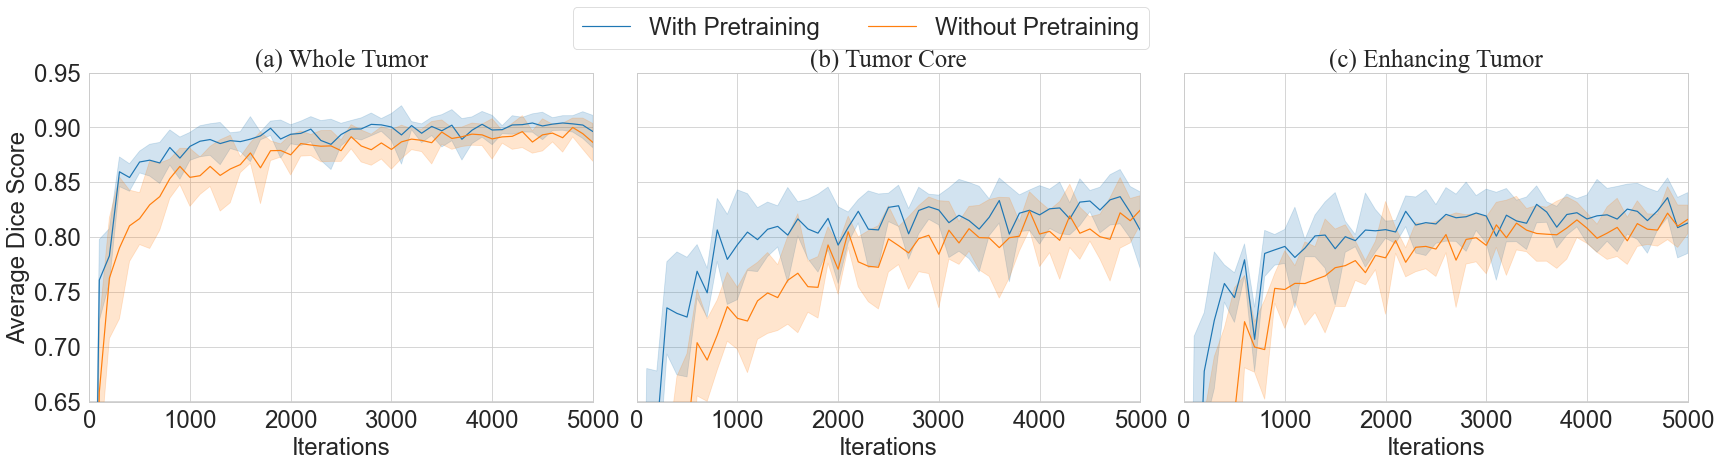

In [9]:
# 3D

label_dict = {
    'edema': '(a) Whole Tumor',
    'tumor_core': '(b) Tumor Core',
    'enhancing': '(c) Enhancing Tumor'
}

f, axes = plt.subplots(1, 3)
f.set_size_inches(24, 6)
# sns.despine(left=True)
sns.set_style("whitegrid")

for i_plot, tumor_region in enumerate(['edema', 'tumor_core', 'enhancing']):
    
    print(f"i: {i_plot}, Tumor region: {tumor_region}")

    label = label_dict[tumor_region]

    df_no_pretr = pd.concat([lr_no_pretr_val[i][tumor_region][['steps', 'values']].iloc[:] for i in range(5)], axis=0)
    df_pretr = pd.concat([lr_pretr_val[i][tumor_region][['steps', 'values']].iloc[:] for i in range(5)], axis=0)

#     df_no_pretr = df_no_pretr.rename(columns={"steps": "Iterations", "values": "Average Dice Score"})
#     df_pretr = df_pretr.rename(columns={"steps": "Iterations", "values": "Average Dice Score"})

    df_no_pretr = df_no_pretr.rename(columns={"steps": "Iterations", "values": "Average Dice Score"})
    df_pretr = df_pretr.rename(columns={"steps": "Iterations", "values": "Average Dice Score"})
    
    df_no_pretr.to_csv(f"Albunet3d_nopretrained_{tumor_region}.csv", index=False)
    df_pretr.to_csv(f"Albunet3d_pretrained_{tumor_region}.csv", index=False)

    #idxs = lr_no_pretr_val[i]['tumor_core']['steps']
    #df_no_pretr = pd.concat([idxs, df_no_pretr], axis=1).set_index('steps')
    #df_pretr = pd.concat([idxs, df_pretr], axis=1).set_index('steps')
    # relplot
    f = sns.lineplot(x='Iterations', y='Average Dice Score', data=df_pretr, markers=True, label='With Pretraining', ci='sd', legend=False, ax=axes[i_plot])
    g = sns.lineplot(x='Iterations', y='Average Dice Score', data=df_no_pretr, markers=True, label='Without Pretraining', ci='sd', legend=False, ax=axes[i_plot])
    f.set(ylim=(0.65, 0.95))
    g.set(ylim=(0.65, 0.95))
    f.set(xlim=(0, 5000))
    g.set(xlim=(0, 5000))
    axes[i_plot].title.set_text(label)
    axes[i_plot].title.set_y(-0.4)
    axes[i_plot].title.set_fontfamily('Times New Roman')
    axes[i_plot].title.set_fontsize(25)
    # axes[i_plot].title.set_fontserif('Times New Roman')
    # axes[i_plot].title.set_fontname('Times New Roman')
    # axes[i_plot].legend(loc='lower right')
    
    if i_plot > 0:
        #pass
        axes[i_plot].set_ylabel('')
        #axes[i_plot].get_yaxis().set_visible(False)
        axes[i_plot].set_yticklabels([''] * 7)

handles, labels = axes[0].get_legend_handles_labels()
plt.tight_layout()
legend = plt.figlegend(handles=handles, labels=labels, loc='upper center', ncol=2, bbox_to_anchor = (0,0.1,1,1), bbox_transform = plt.gcf().transFigure)

plt.savefig("figures/eval_progress.pdf", bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

# for i in range(5):
    
    # sns.lineplot(x='steps', y='values', data=lr_no_pretr_val[i]['tumor_core'], dashes=True, markers=True)
    # sns.lineplot(x='steps', y='values', data=lr_pretr_val[i]['edema'], dashes=False, markers=True)


In [240]:
df_final_no_pretr = pd.DataFrame()
df_final_pretr = pd.DataFrame()
for i_plot, tumor_region in enumerate(['edema', 'tumor_core', 'enhancing']):
    
    print(f"i: {i_plot}, Tumor region: {tumor_region}")

    label = label_dict[tumor_region]

    df_no_pretr = pd.concat([lr_no_pretr_val[i][tumor_region][['values']].iloc[:] for i in range(5)], axis=0)
    df_pretr = pd.concat([lr_pretr_val[i][tumor_region][['values']].iloc[:] for i in range(5)], axis=0)

#     df_no_pretr = df_no_pretr.rename(columns={"steps": "Iterations", "values": "Average Dice Score"})
#     df_pretr = df_pretr.rename(columns={"steps": "Iterations", "values": "Average Dice Score"})

    df_no_pretr = df_no_pretr.rename(columns={"values": tumor_region}).reset_index(drop=True)
    df_pretr = df_pretr.rename(columns={"values": tumor_region}).reset_index(drop=True)
    
    df_final_no_pretr = pd.concat([df_final_no_pretr, df_no_pretr],axis=1)
    df_final_pretr = pd.concat([df_final_pretr, df_pretr],axis=1)
    
df_final_no_pretr.to_csv(f"Albunet3d_nopretrained_results.csv", index=False)
df_final_pretr.to_csv(f"Albunet3d_pretrained_results.csv", index=False)

i: 0, Tumor region: edema
i: 1, Tumor region: tumor_core
i: 2, Tumor region: enhancing


In [6]:
import matplotlib.font_manager
matplotlib.font_manager

<module 'matplotlib.font_manager' from 'C:\\Users\\JiachennCJC\\anaconda3\\envs\\FYP\\lib\\site-packages\\matplotlib\\font_manager.py'>

In [7]:
matplotlib.__file__

'C:\\Users\\JiachennCJC\\anaconda3\\envs\\FYP\\lib\\site-packages\\matplotlib\\__init__.py'

In [8]:
plt.savefig("figures/test.pdf")

<Figure size 432x288 with 0 Axes>

In [20]:
df_pretr

,Iterations,Average Dice Score
0,0,0.000000
1,100,0.171009
2,200,0.754537
3,300,0.688613
4,400,0.754203
5,500,0.762528
6,600,0.800899
7,700,0.769212
8,800,0.604837
9,900,0.794115


In [66]:
np.mean(df_pretr["Average Dice Score"].values)
# print(df_no_pretr.head())

0.7788612670374706

In [51]:
test_data_pre = df_pretr.iloc[0:66].values
test_data_non_pre = df_no_pretr.iloc[0:66].values

test_df = np.vstack([test_data_pre, test_data_non_pre])
df = pd.DataFrame(test_df)

In [53]:
df

,0,1
0,0.0,0.000000
1,100.0,0.525409
2,200.0,0.631919
3,300.0,0.748729
4,400.0,0.754222
...,...,...
127,1000.0,0.712623
128,1100.0,0.764466
129,1200.0,0.764590
130,1300.0,0.746154


In [32]:
df

,0,1
0,0.0,0.000000
1,100.0,0.525409
2,200.0,0.631919
3,300.0,0.748729
4,400.0,0.754222
...,...,...
127,1000.0,0.712623
128,1100.0,0.764466
129,1200.0,0.764590
130,1300.0,0.746154


<AxesSubplot:xlabel='steps', ylabel='values'>

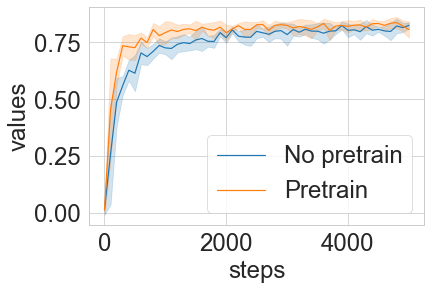

In [25]:
# 2D

df = pd.DataFrame()

df_no_pretr = pd.concat([lr_no_pretr_val[i]['tumor_core'] for i in range(5)]) # .iloc[:20]
df_pretr = pd.concat([lr_pretr_val[i]['tumor_core'] for i in range(5)]) # .iloc[:20]

# relplot

sns.lineplot(x='steps', y='values', data=df_no_pretr, markers=True, label='No pretrain', ci='sd')
sns.lineplot(x='steps', y='values', data=df_pretr, markers=True, label='Pretrain', ci='sd')

# for i in range(5):
    
    # sns.lineplot(x='steps', y='values', data=lr_no_pretr_val[i]['tumor_core'], dashes=True, markers=True)
    # sns.lineplot(x='steps', y='values', data=lr_pretr_val[i]['edema'], dashes=False, markers=True)


In [26]:
df_no_pretr.iloc[:20]

,times,steps,values
0,1.614609e+09,0,0.000000
1,1.614609e+09,100,0.427397
2,1.614609e+09,200,0.413966
3,1.614609e+09,300,0.620342
4,1.614609e+09,400,0.574537
5,1.614610e+09,500,0.602193
6,1.614610e+09,600,0.618805
7,1.614610e+09,700,0.718286
8,1.614610e+09,800,0.685818
9,1.614610e+09,900,0.716317


In [40]:
lr = LogReader('tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50')

In [41]:
train_events = lr.load_run(0, test=False)
test_events = lr.load_run(0, test=True)

INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50/20190710-144501/train/events.out.tfevents.1562769901.py-notebook0-82327-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50/20190710-144501/train/events.out.tfevents.1562769901.py-notebook0-82327-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50/20190710-144501/test/events.out.tfevents.1562769902.py-notebook0-82327-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50/20190710-144501/test/events.out.tfevents.1562769902.py-notebook0-82327-prod


In [42]:
lr.get_available_scalars(train_events)

['edema', 'tumor_core', 'loss', 'enhancing']

In [43]:
lr.get_available_scalars(test_events)

['edema', 'enhancing', 'tumor_core', 'loss']

In [44]:
train_losses = lr.get_df_from_scalar(train_events, 'loss')
train_dices = lr.get_df_from_scalar(train_events, 'tumor_core')
test_losses = lr.get_df_from_scalar(test_events, 'loss')
test_dices = lr.get_df_from_scalar(test_events, 'tumor_core')

In [11]:
# fa: why is the train loss at the end of the training still so high, but accuracy is good?
train_losses.iloc[-1]

times     1.562523e+09
steps     9.900000e+01
values    1.198570e-02
Name: 99, dtype: float64

In [12]:
# backprop
train_losses.iloc[-1]

times     1.562523e+09
steps     9.900000e+01
values    1.198570e-02
Name: 99, dtype: float64

In [13]:
# backprop
train_dices.head()

,times,steps,values
0,1.562523e+09,99,0.193524


In [12]:
test_accuracies

,times,steps,values
0,1.554997e+09,938,80.980003
1,1.554998e+09,1876,87.239998
2,1.554998e+09,2814,87.360001
3,1.554998e+09,3752,91.290001
4,1.554998e+09,4690,90.720001
5,1.554998e+09,5628,89.800003
6,1.554998e+09,6566,92.870003
7,1.554998e+09,7504,90.809998
8,1.554998e+09,8442,92.040001
9,1.554998e+09,9380,93.720001


In [32]:
train_dices.iloc[-1]

steps     9.999000e+03
times     1.561642e+09
values    9.334302e-01
Name: 99, dtype: float64

In [16]:
train_losses.head()

,times,steps,values
0,1.562521e+09,0,0.013753
1,1.562521e+09,1,0.013669
2,1.562521e+09,2,0.013583
3,1.562521e+09,3,0.013447
4,1.562521e+09,4,0.013506


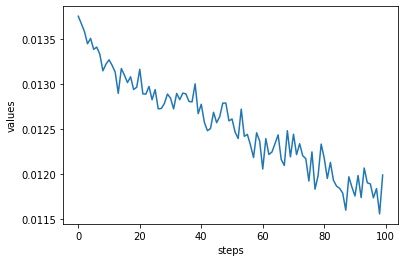

In [14]:
sns.lineplot(x='steps', y='values', data=train_losses)

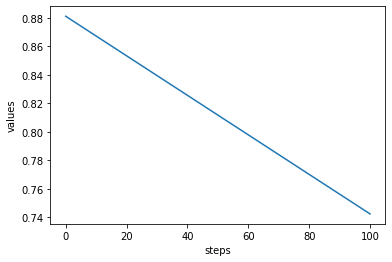

In [15]:
sns.lineplot(x='steps', y='values', data=test_losses)

In [10]:
train_dices.head()

,times,steps,values
0,1.562523e+09,99,0.193524


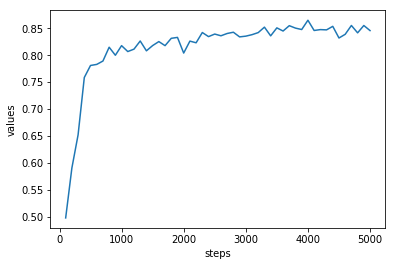

In [8]:
sns.lineplot(x='steps', y='values', data=train_dices)

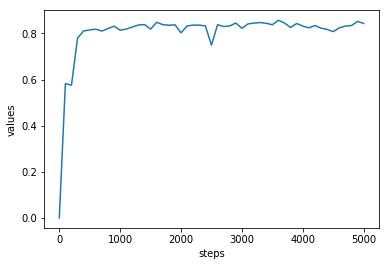

In [9]:
sns.lineplot(x='steps', y='values', data=test_dices)

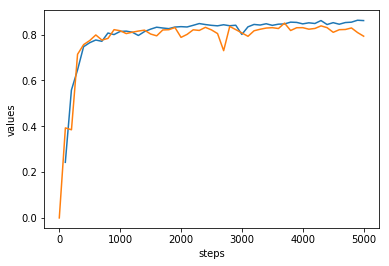

In [45]:
sns.lineplot(x='steps', y='values', data=train_dices)
sns.lineplot(x='steps', y='values', data=test_dices)

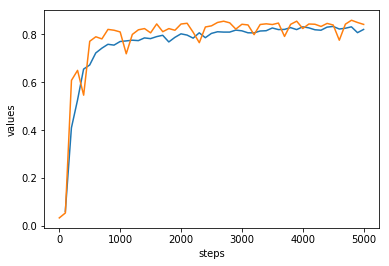

In [20]:
sns.lineplot(x='steps', y='values', data=train_dices)
sns.lineplot(x='steps', y='values', data=test_dices)

In [25]:
test_dices.iloc[-1]

steps     5.000000e+03
times     1.562633e+09
values    8.248324e-01
Name: 50, dtype: float64

In [21]:
test_dices.iloc[-1]

steps     5.000000e+03
times     1.562680e+09
values    8.416548e-01
Name: 50, dtype: float64

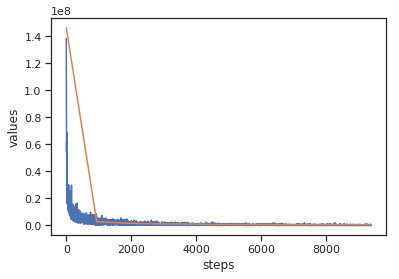

In [15]:
sns.lineplot(x='steps', y='values', data=train_losses)
sns.lineplot(x='steps', y='values', data=test_losses)

In [40]:
import numpy as np

test = np.arange(100)
batch_size = 10

[
    [0,1,2,3,4,5,6,7,8,9],...
    
    
]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])